In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2 = pd.read_csv("Unemployment in India.csv")

In [3]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [4]:
df1.rename(columns={"Estimated Unemployment Rate (%)": "Unemployment Rate"}, inplace=True)
df2.rename(columns={"Estimated Unemployment Rate (%)": "Unemployment Rate"}, inplace=True)

In [5]:
df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True)
df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True)

In [6]:
merged_df = pd.concat([df1[["Region", "Date", "Unemployment Rate"]], df2[["Region", "Date", "Unemployment Rate"]]])
merged_df.reset_index(drop=True, inplace=True)


In [7]:
print("Missing values:\n", merged_df.isnull().sum())

Missing values:
 Region               28
Date                 28
Unemployment Rate    28
dtype: int64


In [8]:
merged_df.dropna(subset=["Unemployment Rate"], inplace=True)

In [9]:
print("\nSummary:\n", merged_df.describe())


Summary:
                                 Date  Unemployment Rate
count                           1007        1007.000000
mean   2020-01-31 06:06:04.647467776          11.906991
min              2019-05-31 00:00:00           0.000000
25%              2019-09-30 00:00:00           4.685000
50%              2020-01-31 00:00:00           8.890000
75%              2020-05-31 00:00:00          16.125000
max              2020-10-31 00:00:00          76.740000
std                              NaN          10.739549


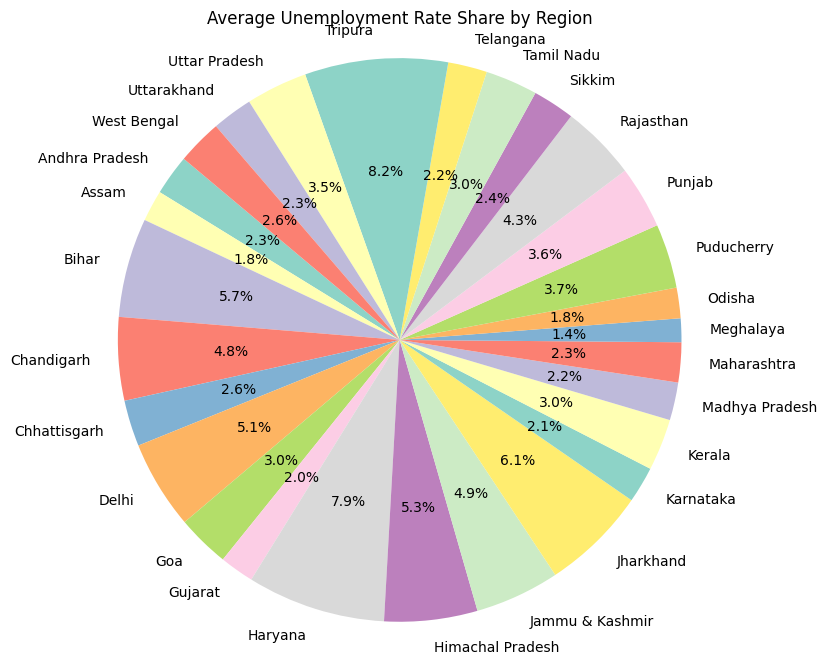

In [20]:
# Calculate average unemployment per region
avg_unemp = merged_df.groupby("Region")["Unemployment Rate"].mean()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(avg_unemp, labels=avg_unemp.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Average Unemployment Rate Share by Region")
plt.axis('equal')  # Equal aspect ratio to ensure pie is circular
plt.show()


C:\Users\91863\AppData\Local\Temp\ipykernel_4152\1818052570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_region.index, y=avg_region.values, palette="viridis")


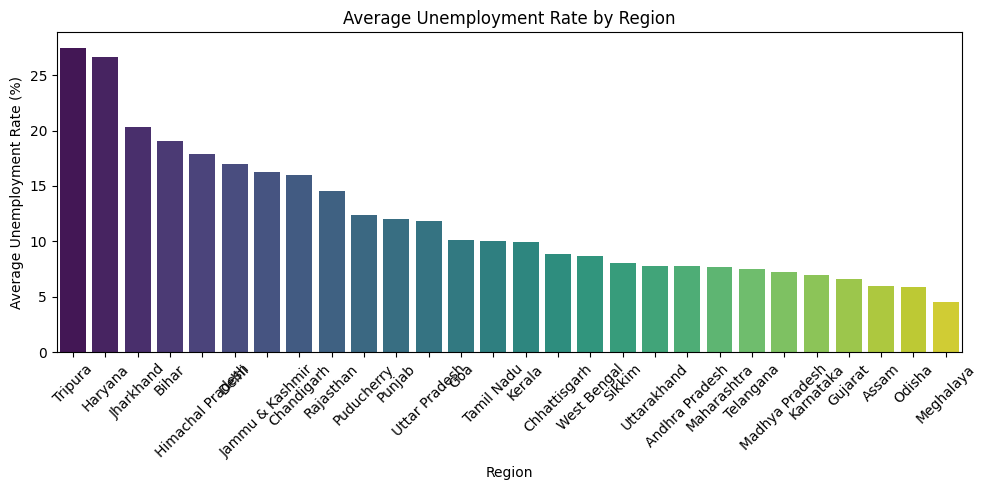

In [19]:
avg_region = merged_df.groupby("Region")["Unemployment Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_region.index, y=avg_region.values, palette="viridis")
plt.title("Average Unemployment Rate by Region")
plt.xticks(rotation=45)
plt.ylabel("Average Unemployment Rate (%)")
plt.tight_layout()
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_4152\2756423262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_data, x="Region", y="Unemployment Rate", palette="coolwarm")


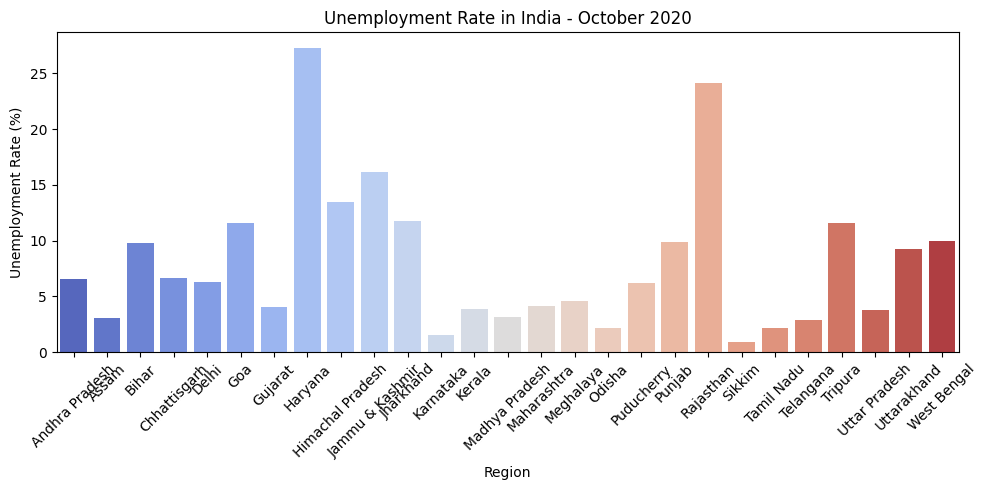

In [15]:
latest_date = merged_df["Date"].max()
latest_data = merged_df[merged_df["Date"] == latest_date]

plt.figure(figsize=(10,5))
sns.barplot(data=latest_data, x="Region", y="Unemployment Rate", palette="coolwarm")
plt.title(f"Unemployment Rate in India - {latest_date.strftime('%B %Y')}")
plt.xticks(rotation=45)
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

In [16]:
national_avg = merged_df["Unemployment Rate"].mean()
highest_region = avg_region.idxmax()
lowest_region = avg_region.idxmin()

In [17]:
print(f"\n🔍 National average unemployment rate: {national_avg:.2f}%")
print(f"🔺 Region with highest average unemployment: {highest_region} ({avg_region.max():.2f}%)")
print(f"🔻 Region with lowest average unemployment: {lowest_region} ({avg_region.min():.2f}%)")


🔍 National average unemployment rate: 11.91%
🔺 Region with highest average unemployment: Tripura (27.48%)
🔻 Region with lowest average unemployment: Meghalaya (4.55%)


In [21]:
# Add Employment Rate column
merged_df["Employment Rate"] = 100 - merged_df["Unemployment Rate"]

# Display first few rows
merged_df[["Date", "Region", "Unemployment Rate", "Employment Rate"]].head()


,Date,Region,Unemployment Rate,Employment Rate
0,2020-01-31,Andhra Pradesh,5.48,94.52
1,2020-02-29,Andhra Pradesh,5.83,94.17
2,2020-03-31,Andhra Pradesh,5.79,94.21
3,2020-04-30,Andhra Pradesh,20.51,79.49
4,2020-05-31,Andhra Pradesh,17.43,82.57


In [24]:
merged_df["Employment Rate"] = 100 - merged_df["Unemployment Rate"]

In [25]:
merged_df = pd.concat([
    df1[["Region", "Date", "Unemployment Rate"]],
    df2[["Region", "Date", "Unemployment Rate"]]
])

In [27]:
merged_df["Employment Rate"] = 100 - merged_df["Unemployment Rate"]

In [28]:
comparison_df = merged_df.groupby("Region")[["Unemployment Rate", "Employment Rate"]].mean().reset_index()

comparison_melted = comparison_df.melt(
    id_vars="Region",
    value_vars=["Unemployment Rate", "Employment Rate"],
    var_name="Rate Type",
    value_name="Rate"
)

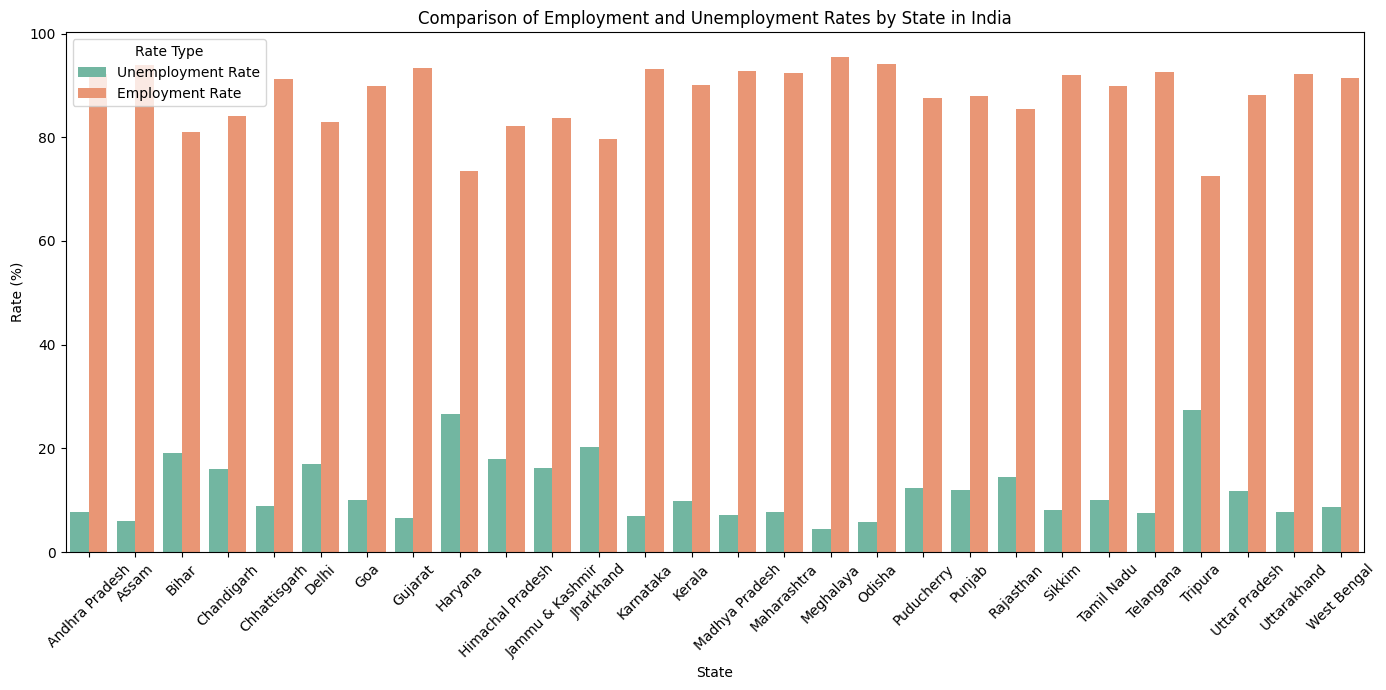

In [29]:
plt.figure(figsize=(14,7))
sns.barplot(data=comparison_melted, x="Region", y="Rate", hue="Rate Type", palette="Set2")
plt.title("Comparison of Employment and Unemployment Rates by State in India")
plt.xlabel("State")
plt.ylabel("Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Rate Type")
plt.tight_layout()
plt.show()

In [30]:
top_employment_states = merged_df.groupby("Region")["Employment Rate"].mean().sort_values(ascending=False).head(3)

In [31]:
print("🔝 Top 3 States with Highest Employment Rate in India:")
print(top_employment_states)

🔝 Top 3 States with Highest Employment Rate in India:
Region
Meghalaya    95.453243
Odisha       94.130526
Assam        94.008611
Name: Employment Rate, dtype: float64
